In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [3]:
df = pd.read_csv("./dataset/data.csv")
df.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [5]:
all_columns = df.columns
all_columns

Index(['Id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

## `EDA: ` Exploratory Data Analysis

### Drop Id Column

In [6]:
# Drop the id column as it is not required for now
print(f"Shape of dataset befor id removal: {df.shape}")
del df['Id']
print(f"Shape of dataset After id removal: {df.shape}")

Shape of dataset befor id removal: (45211, 18)
Shape of dataset After id removal: (45211, 17)


### Drop Null Values

In [7]:
df.isnull().sum()
print(f"Shape of dataset befor drop null values: {df.shape}")
total_rows = len(df.y)
df = df.dropna()
print(f"Shape of dataset after drop null values: {df.shape}")
print(f"Total number of rows contains null values: {total_rows - len(df.y)}")

Shape of dataset befor drop null values: (45211, 17)
Shape of dataset after drop null values: (45200, 17)
Total number of rows contains null values: 11


### Make feature list

In [8]:
target = 'y'
# create the list of categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(f"categorical_features : {categorical_features}")
# create the list of numerical features
numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()
print(f"numerical_features : {numerical_features}")

categorical_features : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
numerical_features : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


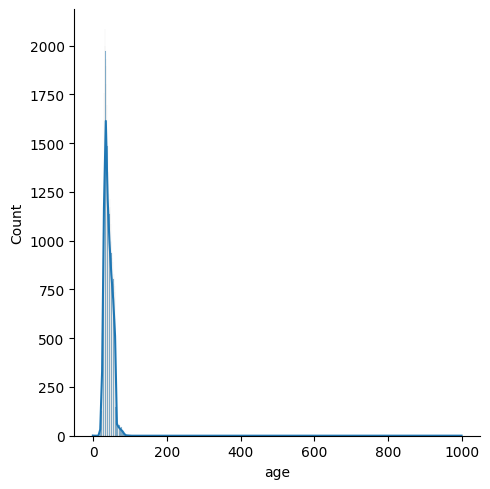

In [9]:
sns.displot(df.age, kde=True)

In [11]:
df.age.describe()

count    45200.000000
mean        40.954292
std         11.539117
min         -1.000000
25%         33.000000
50%         39.000000
75%         48.000000
max        999.000000
Name: age, dtype: float64

we can see `-1` and `999.0` are the anomalies in the data set. lets drop it

In [14]:
# This is illogical or not possible value
print(f"number of records for 999.0 {df.age[df.age > 100].value_counts()}")
print(f"number of records for -1 {df.age[df.age < 0].value_counts()}")

number of records for 999.0 age
999.0    1
Name: count, dtype: int64
number of records for -1 age
-1.0    3
Name: count, dtype: int64


In [15]:
# Let's drop the illogical age value
df = df[df.age != 999.0]
df = df[df.age != -1]

count    45196.000000
mean        40.935879
std         10.617774
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

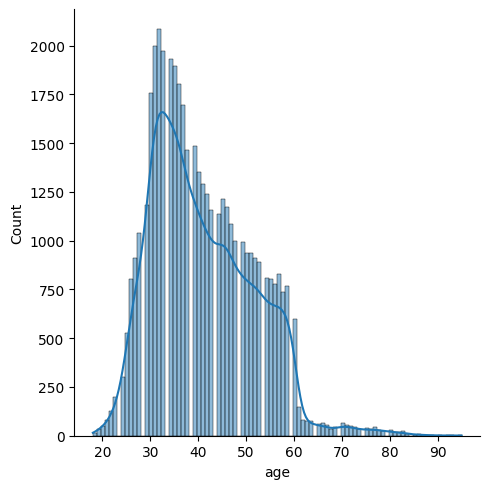

In [18]:
# After dropping the illogical Age Value
sns.displot(df.age, kde=True)

df.age.describe()

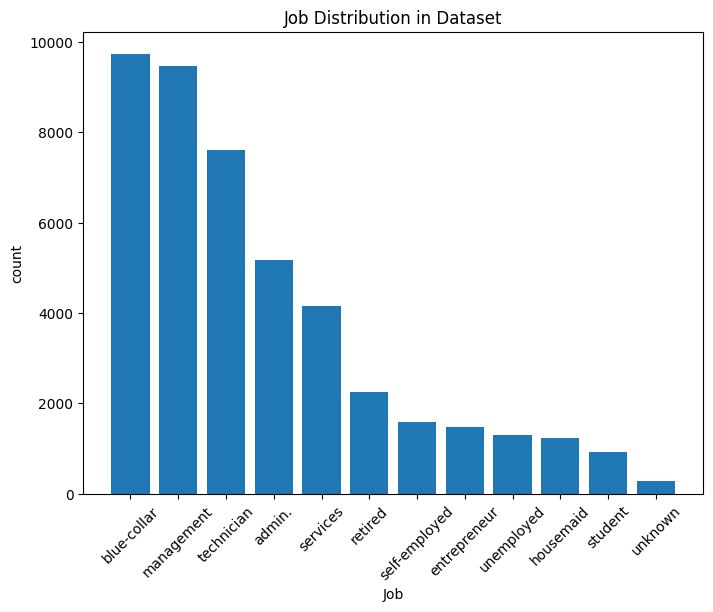

job
blue-collar      9730
management       9456
technician       7594
admin.           5169
services         4153
retired          2262
self-employed    1579
entrepreneur     1485
unemployed       1303
housemaid        1240
student           937
unknown           288
Name: count, dtype: int64
----------------------------------


count           45196
unique             12
top       blue-collar
freq             9730
Name: job, dtype: object

In [23]:
import matplotlib.pyplot as plt
job_category_count = df['job'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(job_category_count.index, job_category_count.values)

plt.xlabel('Job')
plt.ylabel('count')
plt.title('Job Distribution in Dataset')
plt.xticks(rotation=45)
plt.show()

print(f"{df['job'].value_counts()}")
print("----------------------------------")
df['job'].describe()

## Analyse `df['marital']`

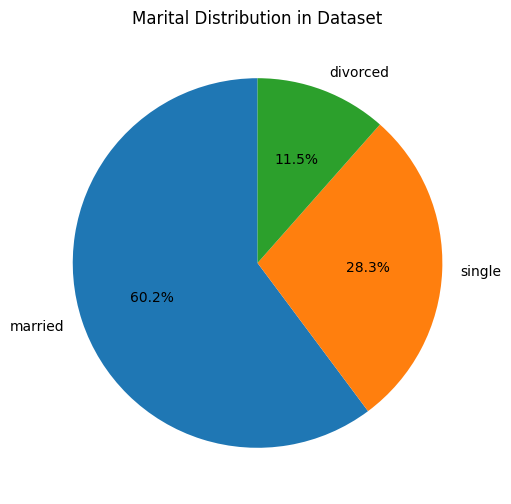

marital
married     27208
single      12782
divorced     5206
Name: count, dtype: int64
----------------------------------


count       45196
unique          3
top       married
freq        27208
Name: marital, dtype: object

In [25]:
marital_status_count = df['marital'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(marital_status_count, labels=marital_status_count.index, startangle=90, autopct='%1.1f%%',)

plt.title('Marital Distribution in Dataset')
plt.show()

print(f"{df['marital'].value_counts()}")
print("----------------------------------")
df['marital'].describe()

## Analyse `df['education']`

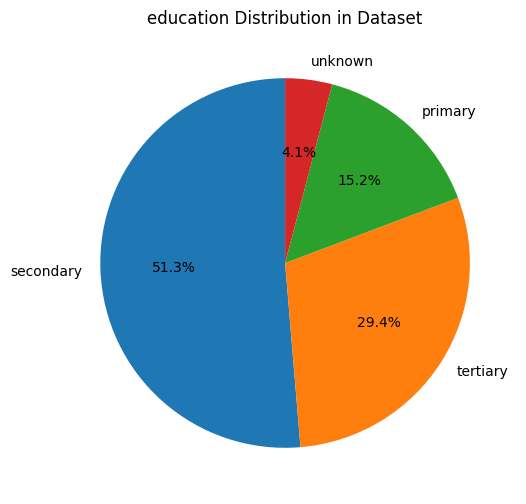

education
secondary    23197
tertiary     13295
primary       6849
unknown       1855
Name: count, dtype: int64
----------------------------------


count         45196
unique            4
top       secondary
freq          23197
Name: education, dtype: object

In [26]:
education_count = df['education'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(education_count, labels=education_count.index, startangle=90, autopct='%1.1f%%',)

plt.title('education Distribution in Dataset')
plt.show()

print(f"{df['education'].value_counts()}")
print("----------------------------------")
df['education'].describe()

## Relationship between `age` and `balance`
lets visualize it using scatter plot

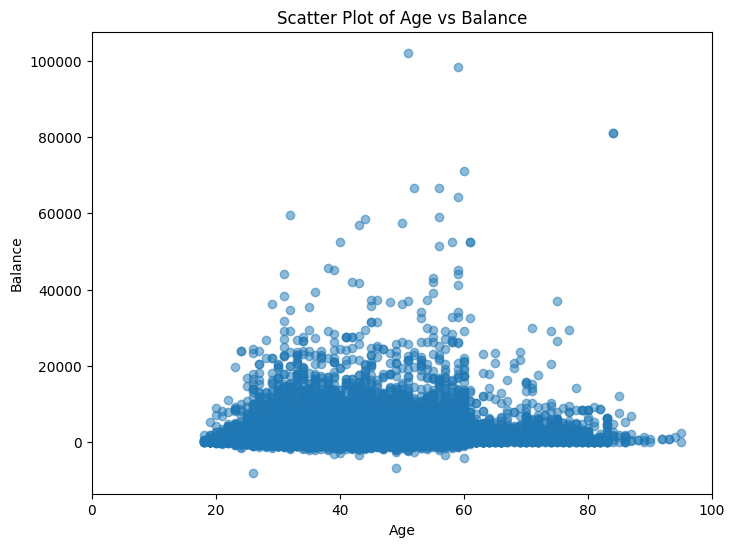

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['balance'], alpha=0.5)
plt.xlim(0, 100)
plt.title('Scatter Plot of Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

## Relationship between `age` and `loan`
lets visualize it using scatter plot

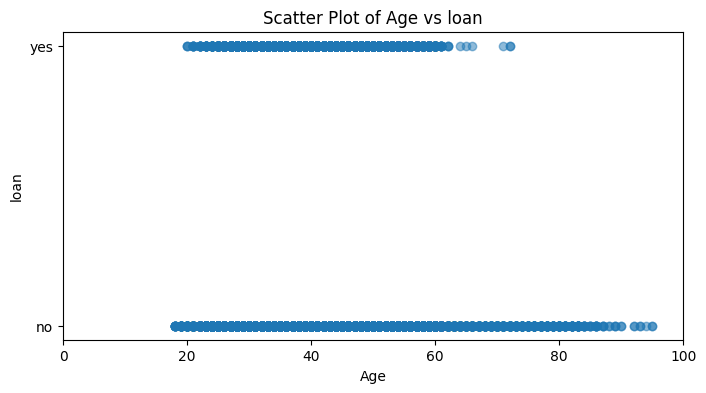

In [69]:
plt.figure(figsize=(8, 4))
plt.scatter(df['age'], df['loan'], alpha=0.5)
plt.xlim(0, 100)
plt.title('Scatter Plot of Age vs loan')
plt.xlabel('Age')
plt.ylabel('loan')
plt.show()

### `Calculate mutual information of categorical variables`

In [29]:
from sklearn.metrics import mutual_info_score
scores = []
for col in categorical_features:
    score = mutual_info_score(df[target], df[col])
    scores.append(round(score, 4))
    print(f"{col} -> {round(score, 4)}")
print(f"Scores : {scores}")

job -> 0.0082
marital -> 0.0021
education -> 0.0026
default -> 0.0003
housing -> 0.0096
loan -> 0.0026
contact -> 0.0136
month -> 0.0244
poutcome -> 0.0294
y -> 0.3608
Scores : [0.0082, 0.0021, 0.0026, 0.0003, 0.0096, 0.0026, 0.0136, 0.0244, 0.0294, 0.3608]


In [30]:
import numpy as np

categorical_data = np.array(list(zip(categorical_features, scores)), dtype=[('category', 'U10'), ('value', float)])

# Sort the NumPy array by the 'value' field
sorted_data = np.sort(categorical_data, order='value')

# Convert the sorted NumPy array back to a list of tuples (optional)
sorted_list = sorted_data.tolist()

sorted_list

[('default', 0.0003),
 ('marital', 0.0021),
 ('education', 0.0026),
 ('loan', 0.0026),
 ('job', 0.0082),
 ('housing', 0.0096),
 ('contact', 0.0136),
 ('month', 0.0244),
 ('poutcome', 0.0294),
 ('y', 0.3608)]

### Here `default` feature looks like have very less value as compare to others
so lets drop it

In [31]:
del df['default']
categorical_features.remove('default')

print(f"categorical features : {categorical_features}")

categorical features : ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


### Convert target feature into numerical from categorical

In [32]:
df[target] = df[target].replace({'yes': 1, 'no': 0})
numerical_features = numerical_features + [target]
print(f"numerical_features : {numerical_features}")

numerical_features : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']


### Find corelation between numerical features:

Text(0.5, 1.0, 'Correlation Heatmap')

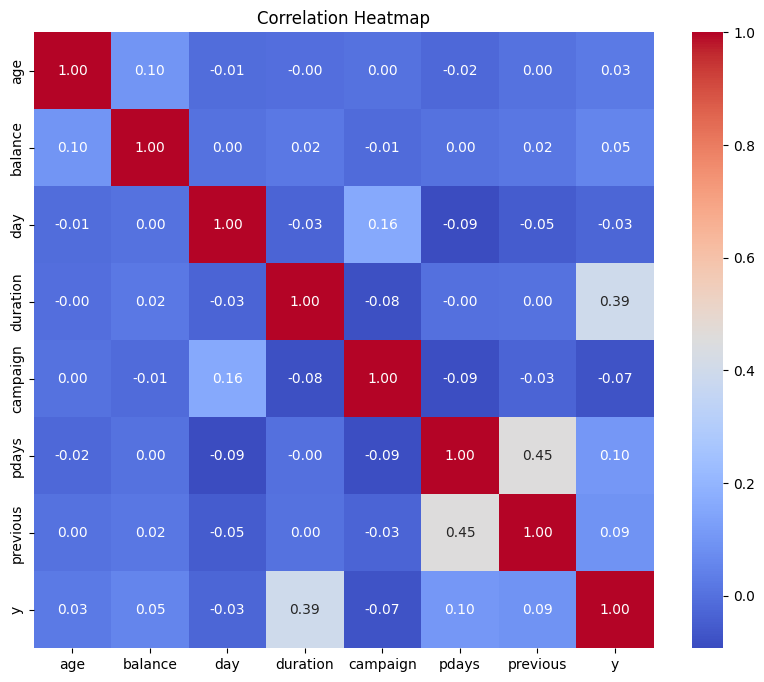

In [33]:
corr_matrix = df[numerical_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot= True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

### Split Data into Tran/Test/Val

In [34]:
from sklearn.model_selection import train_test_split

def split_data(df):    
    df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
    df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

    print(f"train data size: {len(df_train)}, Test data size: {len(df_test)}, Validation data size: {len(df_val)}")

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train[target].values
    y_val = df_val[target].values
    y_test = df_test[target].values

    del df_train[target]
    del df_val[target]
    del df_test[target]
    
    return df_train, y_train, df_val, y_val, df_test, y_test

In [35]:
df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)

train data size: 27117, Test data size: 9040, Validation data size: 9039


In [36]:
y_train.sum(), y_val.sum(), y_test.sum()

(3172, 1031, 1083)

In [47]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
def pre_process_data(df_train, df_val, df_test):
  """
  Preprocess the data including one-hot encoding and standardization.

  Args:
    df_train (pd.DataFrame): Training data.
    df_val (pd.DataFrame): Validation data.
    df_test (pd.DataFrame): Test data.

  Returns:
    Tuple: Tuple containing the DictVectorizer, StandardScaler, and preprocessed data.
  """
  dict_train = df_train.to_dict(orient='records')
  dict_val = df_val.to_dict(orient='records')
  dict_test = df_test.to_dict(orient='records')

  dv = DictVectorizer(sparse=False)
  X_train = dv.fit_transform(dict_train)
  X_val = dv.transform(dict_val)
  X_test = dv.transform(dict_test)

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_val = scaler.transform(X_val)
  X_test = scaler.transform(X_test)

  return dv, scaler, X_train, X_val, X_test

In [48]:
dv, scaler, X_train, X_val, X_test = pre_process_data(df_train, df_val, df_test)

### Add One Hot Encoding for categorical features

In [40]:
def prepare_dictionaries(df: pd.DataFrame):
    dicts = df.to_dict(orient='records')
    return dicts

dict_train = prepare_dictionaries(df_train)
dict_val = prepare_dictionaries(df_val)
dict_test = prepare_dictionaries(df_test)

In [50]:
pd.DataFrame(X_train).to_csv("./dataset/train.csv")
pd.DataFrame(y_train).to_csv("./dataset/train_label.csv")
pd.DataFrame(X_test).to_csv("./dataset/test.csv")
pd.DataFrame(y_test).to_csv("./dataset/test_label.csv")
pd.DataFrame(X_val).to_csv("./dataset/val.csv")
pd.DataFrame(y_val).to_csv("./dataset/val_label.csv")

In [51]:
X_train[0]

array([-0.65508302,  3.97952344, -0.57205042,  0.73130616, -0.26185115,
       -0.63024387, -0.33796669,  1.84223812, -0.42205356, -1.0259667 ,
        1.54913669, -0.20900739,  1.11786702, -1.11786702, -0.3633146 ,
       -0.52521801, -0.18750477, -0.16691286,  1.95118589, -0.22844785,
       -0.188031  , -0.3133137 , -0.14468223, -0.45168876, -0.17266046,
       -0.07800427,  0.4348948 , -0.4348948 , -0.35966287, -1.2287814 ,
        1.58827053, -0.2637756 ,  2.49507909, -0.07020575, -0.24974032,
       -0.17923235, -0.42598787, -0.36688215, -0.10415222, -0.65654533,
       -0.31110858, -0.13034262, -0.1133524 , -0.40946955, -0.34991262,
       -0.20571852, -0.18399907,  0.47237631, -0.30367575])

## Import required libraries

In [ ]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import xgboost as xgb

In [53]:
# List of models with their configurations
model_des_list = [
  {
    "name": "LR",
    "model": LogisticRegression(),
    "params": {
      "solver": ['liblinear'],
      "C": [1.0],
      "max_iter": [10, 50, 100]
    }
  },
  {
    "name": "DecisionTreeClassifier",
    "model": DecisionTreeClassifier(),
  },
  {
    "name": "RandomForestClassifier",
    "model": RandomForestClassifier(),
  },
  {
    "name": "XGBClassifier",
    "model": xgb.XGBClassifier(
      objective="binary:logistic",  # For binary classification
      random_state=42,              # Random seed for reproducibility
      n_jobs=-1,                    # Used for parallel processing, It will use all available CPU's
      use_label_encoder=False
    ),
    "params": {
      "n_estimators": [200],         # Number of boosting rounds
      "learning_rate": [0.1],    # Learning rate
      "max_depth": [5],                 # Maximum depth of each tree
    }
  },
  {
    "name": "LDA",
    "model": LinearDiscriminantAnalysis()
  },
  {
    "name": "NB",
    "model": GaussianNB()
  }
]

In [55]:
from sklearn.model_selection import GridSearchCV
def get_best_params_and_estimator(model_des_list, X_train, y_train, X_val, y_val):
  """
  Get best hyperparameters and estimator by using GridSearchCV

  Args:
    model_des_list: Model information containing model name, model object, set of parameters
    X_train: preprocessed training data set
    y_train: training label
    X_val: preprocessed validation data set
    y_val: validation label

  Returns:
    Tuple: Tuple containing best hyper parameters and best estimators
  """
  model = model_des_list['model']
  model_name = model_des_list['name']
  params = model_des_list.get('params', {})

  grid_search = GridSearchCV(model, params, cv=5)
  grid_search.fit(X_train, y_train)
  best_params = grid_search.best_params_
  best_estimator = grid_search.best_estimator_
  return best_params, best_estimator

In [44]:
def get_model_evaluation(model, X, y):
  """
  Get model evaluation report, It helps us to understand how our model is behaving

  Args:
    model: Model on which we have to evaluate model accuracy
    X: Dataset on which we will evaluate model accuracy
    y: Actual label (Truth label values)
  """
  y_pred = model.predict(X)
  acc = roc_auc_score(y, y_pred)
  return round(acc, 4)

In [57]:
from sklearn.metrics import accuracy_score, roc_auc_score
def get_model_reports(model_des_list, X_train, y_train, X_val, y_val):
  """
  Get the model report based on provided multiple model information

  Args:
    model_des_list: Multiple model information
    X_train, y_train: Training dataset
    X_val, y_val: Validatioin dataset

  Returns:
    List: List of model reports containing, model name, model object, accuracy, hyperparameters
  """
  model_reports = []
  for model_des in model_des_list:
    best_params, best_estimator = get_best_params_and_estimator(model_des, X_train, y_train, X_val, y_val)
    train_accuracy = get_model_evaluation(best_estimator, X_train, y_train)
    val_accuracy = get_model_evaluation(best_estimator, X_val, y_val)
    
    print(f"Model: {model_des['name']}, train_accuracy: {train_accuracy}, validation accuracy: {val_accuracy}")
    
    model_report = {
      "name": model_des["name"],
      "model": best_estimator,
      "best_params": best_params,
      "train_accuracy": train_accuracy,
      "val_accuracy": val_accuracy
    }
    model_reports.append(model_report)

  return model_reports

In [58]:
model_report = get_model_reports(model_des_list, X_train, y_train, X_val, y_val)

Model: LR, train_accuracy: 0.6484, validation accuracy: 0.6722
Model: DecisionTreeClassifier, train_accuracy: 1.0, validation accuracy: 0.7002
Model: RandomForestClassifier, train_accuracy: 1.0, validation accuracy: 0.6912
Model: XGBClassifier, train_accuracy: 0.7966, validation accuracy: 0.7219
Model: LDA, train_accuracy: 0.6958, validation accuracy: 0.7173
Model: NB, train_accuracy: 0.6956, validation accuracy: 0.6995


In [59]:
def get_best_model_info(model_reports):
  """
  Get best model based on accuracy

  Args:
    model_report: List of model reports

  Returns:
    best_model: Best model based on model accuracy
  """
  sorted_report = sorted(model_reports, key=lambda x: x['val_accuracy'], reverse=True)
  return sorted_report[0]

In [60]:
best_model_info = get_best_model_info(model_report)

In [61]:
def save_artifacts(dictVectorizer, standardScaler, model, model_file):
  """
  Save artifacts, that can be used in web server to generate prediction

  Args:
    dictVectorizer: One hot encoder
    standardScaler: Standard Scaler
    model: Best model
    model_file: File name, in which model should be stored
  """
  pipeline = make_pipeline(dictVectorizer, standardScaler, model)
  with open(model_file,'wb') as f_out: 
    pickle.dump(pipeline, f_out)

In [65]:
from sklearn.pipeline import make_pipeline
import pickle
best_model = best_model_info["model"]
save_artifacts(dv, scaler, best_model, "./artifacts/model.bin")

In [66]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)